**Nama : Krisdova Rio Alvonsa** \
**NIM : 210411100165** \
**Kelas : PSD B**

## **DRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/PSDKris3

/content/drive/MyDrive/PSDKris3


## **BUSINESS UNDERSTANDING**

### **TUJUAN PROYEK**

Melakukan klasifikasi pada dataset kelenjar payudara yang didapat dari INEB-Instituto de Engenharia Biomédica, berikut adalah 6 kelas kelainan dari sampel kelenjar payudara : \
1. **Car (Carcinoma)**: Karsinoma, yang merupakan jenis kanker. \
2. **Fad (Fibro-adenoma)**: Fibro-adenoma, sebuah jenis tumor jinak yang umum pada payudara. \
3. **Mas (Mastopathy)**: Mastopati, sebuah kondisi di mana jaringan payudara mengalami perubahan patologis. \
4. **Gla (Glandular)**: Jaringan kelenjar. \
5. **Con (Connective)**: Jaringan ikat. \
6. **Adi (Adipose)**: Jaringan adiposa atau jaringan lemak.

### **DESKRIPSI FITUR**

Berikut adalah fitur-fitur yang terdapat dalam dataset : \
1. **I0 (Impedivitas pada Frekuensi Nol)** \
2. **PA500 (Sudut Fase pada 500 KHz)** \
3. **HFS (Kemiringan Tinggi Frekuensi Sudut Fase)** \
4. **DA (Jarak Impedansi antara Ujung Spektrum)** \
5. **AREA (Luas di Bawah Spektrum)**  \
6. **A/DA (Luas Daerah yang Dinormalisasi oleh DA)** \
7. **MAX IP (Maksimum dari Spektrum)** \
8. **DR (Jarak antara I0 dan Bagian Nyata dari Titik Frekuensi Maksimum)** \
9. **P (Panjang Kurva Spektral)**

### **TAMPILAN DATASET**

Dalam dataset yang digunakan terdapat 106 baris dan 10 kolom

In [ ]:
import pandas as pd

df = pd.read_csv('BreastTissue.csv')
df

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
101,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
102,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
103,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534
104,adi,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


## **DATA UNDERSTANDING**

### **TEKNIK PENGUMPULAN DATA**

Studi kali ini akan membahas dataset tentang pengukuran impedansi listrik dari sampel jaringan/kelenjar yang baru dipotong dari payudara. \
Pengukuran impedansi jaringan payudara yang baru dipotong dilakukan pada frekuensi berikut: 15.625, 31.25, 62.5, 125, 250, 500, 1000 KHz . \
Pengukuran yang diplot pada bidang (real, -imaginary) merupakan spektrum impedansi yang digunakan untuk menghitung fitur jaringan payudara. \

Adapun berikut adalah sumber dari dataset yang digunakan : \
**JP Marques de Sá, INEB-Institut Teknik Biomedis, Porto, Portugal; Email: jpmdesa '@' gmail.com J Jossinet, inserm, Lyon, Prancis**    \

Data dari sampel jaringan/kelenjar payudara di kumpulkan dalam format CSV. \

Jumlah data sampel/baris data : 105 data dengan rincian sebagai berikut : \
- Adipose 22 data
- Carcinoma 21 data
- Mastopathy 18 data
- Glandular 16 data
- Fibro-adenoma 15 data
- Connective 14 data \

**Sumber dataset pada ucimlrepo :** https://archive.ics.uci.edu/dataset/192/breast+tissue


### **TIPS DATA UNDERSTANDING**

1. Memahami dengan mendeskripsikan setiap fitur didalam dataset seperti:
- Deskripsi setiap fitur dalam dataset
- Tipe Data di setiap fitur dalam dataset
2. Melakukan indetifikasi keberadaan Missing Values pada setiap fitur dalam dataset
3. Eksplorasi Data (Visualisasi Data)
4. Mengidentifikasi Outlier yang terdapat dalam dataset
5. Identifikasi data duplikat
6. Mengidentifikasi jumlah proporsi data setiap kelas dalam data agar jika terdapat inbalancing pada data dapat diketahui
7. Rekap Data Understanding


### **1. PEMAHAMAN DATA**

#### **1.1. DESKRIPSI FITUR**

Berikut adalah penjelasan tiap fitur dalam dataset : \
1. **I0 (Impedivitas pada Frekuensi Nol)**: Ini adalah ukuran hambatan listrik pada frekuensi nol, diukur dalam ohm. Dalam konteks ini, ini mewakili seberapa besar hambatan terhadap aliran arus listrik pada frekuensi nol. \
2. **PA500 (Sudut Fase pada 500 KHz)**: Ini adalah sudut fase (angle) dari sinyal pada frekuensi 500 KHz. Sudut fase mengukur perbedaan waktu antara tegangan dan arus dalam sinyal. Nilai PA500 memberikan informasi tentang bagaimana sinyal merespon pada frekuensi ini. \
3. **HFS (Kemiringan Tinggi Frekuensi Sudut Fase)**: Ini mengukur kecuraman (slope) sudut fase pada frekuensi tinggi. Ini memberikan informasi tentang bagaimana sinyal berubah dalam hal sudut fase pada frekuensi tinggi. \
4. **DA (Jarak Impedansi antara Ujung Spektrum)**: Ini adalah jarak dalam hal impedansi antara dua ujung dari spektrum. Ini mencerminkan variasi besar dalam impedansi antara frekuensi tinggi dan rendah dalam spektrum. \
5. **AREA (Luas di Bawah Spektrum)**: Ini mengukur luas daerah di bawah kurva spektrum impedansi. Ini memberikan gambaran tentang total hambatan atau kompleksitas sirkuit elektrik. \
6. **A/DA (Luas Daerah yang Dinormalisasi oleh DA)**: Ini adalah nilai dari area di bawah spektrum yang dinormalisasi oleh jarak impedansi (DA). Ini membantu mempertimbangkan kompleksitas spektrum relatif terhadap jarak impedansi. \
7. **MAX IP (Maksimum dari Spektrum)**: Ini adalah nilai maksimum dari spektrum impedansi. Ini menunjukkan titik dengan hambatan tertinggi dalam spektrum. \
8. **DR (Jarak antara I0 dan Bagian Nyata dari Titik Frekuensi Maksimum)**: Ini adalah jarak antara nilai I0 dan bagian nyata dari titik frekuensi maksimum pada spektrum. Ini memberikan informasi tentang seberapa jauh titik maksimum terletak dari nilai I0. \
9. **P (Panjang Kurva Spektral)**: Ini adalah panjang kurva spektral, yang menggambarkan kompleksitas atau bentuk dari spektrum impedansi. Semakin panjang kurva, semakin kompleks spektrum tersebut.

#### **1.2. TIPE DATA TIAP FITUR**

Adapun 4 jenis data : \
- Data Kategorikal:

    Nominal: Adalah jenis data di mana nilai-nilai tidak memiliki urutan atau peringkat tertentu. \
    Contoh: jenis kelamin, warna mata, jenis kendaraan.

    Ordinal: Adalah jenis data di mana nilai-nilai memiliki urutan atau peringkat tetapi selisih antara nilai-nilai tidak bermakna secara konsisten. \
    Contoh: tingkat kepuasan (rendah, sedang, tinggi), tingkatan pendidikan (SD, SMP, SMA).

- Data Kuantitatif:

    Interval: Adalah jenis data di mana selisih antara nilai-nilai memiliki makna yang konsisten, tetapi tidak ada titik nol yang mutlak. \
    Contoh: suhu dalam Celsius, skala IQ.

    Rasio: Adalah jenis data di mana selisih antara nilai-nilai memiliki makna yang konsisten dan terdapat titik nol yang mutlak. \
    Contoh: umur, tinggi badan, pendapatan.

Berikut adalah tipe atau jenis data pada setiap fitur di dalam dataset, apabila dilihat dari penjelasan di atas : \

- Fitur **Class** memiliki jenis data: **Nominal**, karena nilai-nilai fitur 'Class' tidak memiliki urutan atau peringkat tertentu.
- Fitur  **I0** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **PA500** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **HFS** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **DA** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **Area** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **A/DA** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **Max IP** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **DR** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.
- Fitur  **P** memiliki jenis data: **Rasio**, karena nilai-nilai memiliki makna konsisten dan terdapat titik nol mutlak.

### **2. MISSING VALUE**

Missing value pada dataset adalah nilai yang absen atau tidak terisi untuk suatu variabel dalam dataset. Hal ini bisa terjadi karena beberapa alasan, seperti kesalahan pengumpulan data, kegagalan sensor, atau karena karakteristik alami dari data itu sendiri. \

**Catatan :** Dataset termasuk bagus/baik jika didalamnya tidak terdapat missing value

In [ ]:
# Memeriksa apakah ada nilai hilang pada setiap kolom
Periksa_Nilai_Hilang = df.isnull().any().any()
if Periksa_Nilai_Hilang:
    print("===Tidak ada missing value dalam Dataset===")
    print("\nRingkasan missing value tiap fitur:")
    print(df.isnull().sum())
else:
    print("===Tidak ada missing value dalam Datasset===")
    print("\nRingkasan missing value tiap fitur:")
    print(df.isnull().sum())

===Tidak ada missing value dalam Datasset===

Ringkasan missing value tiap fitur:
Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64


### **3. EKSPLORASI DATA (VISUALISASI DATA)**

Eksplorasi Data adalah proses menggunakan alat visual untuk mengeksplorasi, menganalisis, dan memahami informasi yang terkandung dalam dataset dengan tujuan untuk mendapatkan pemahaman yang lebih baik serta menemukan wawasan yang berguna dari data tersebut. Salah satu tujuan dari eksplorasi data ialah agar lebih mudah untuk memahami karakteristik data.

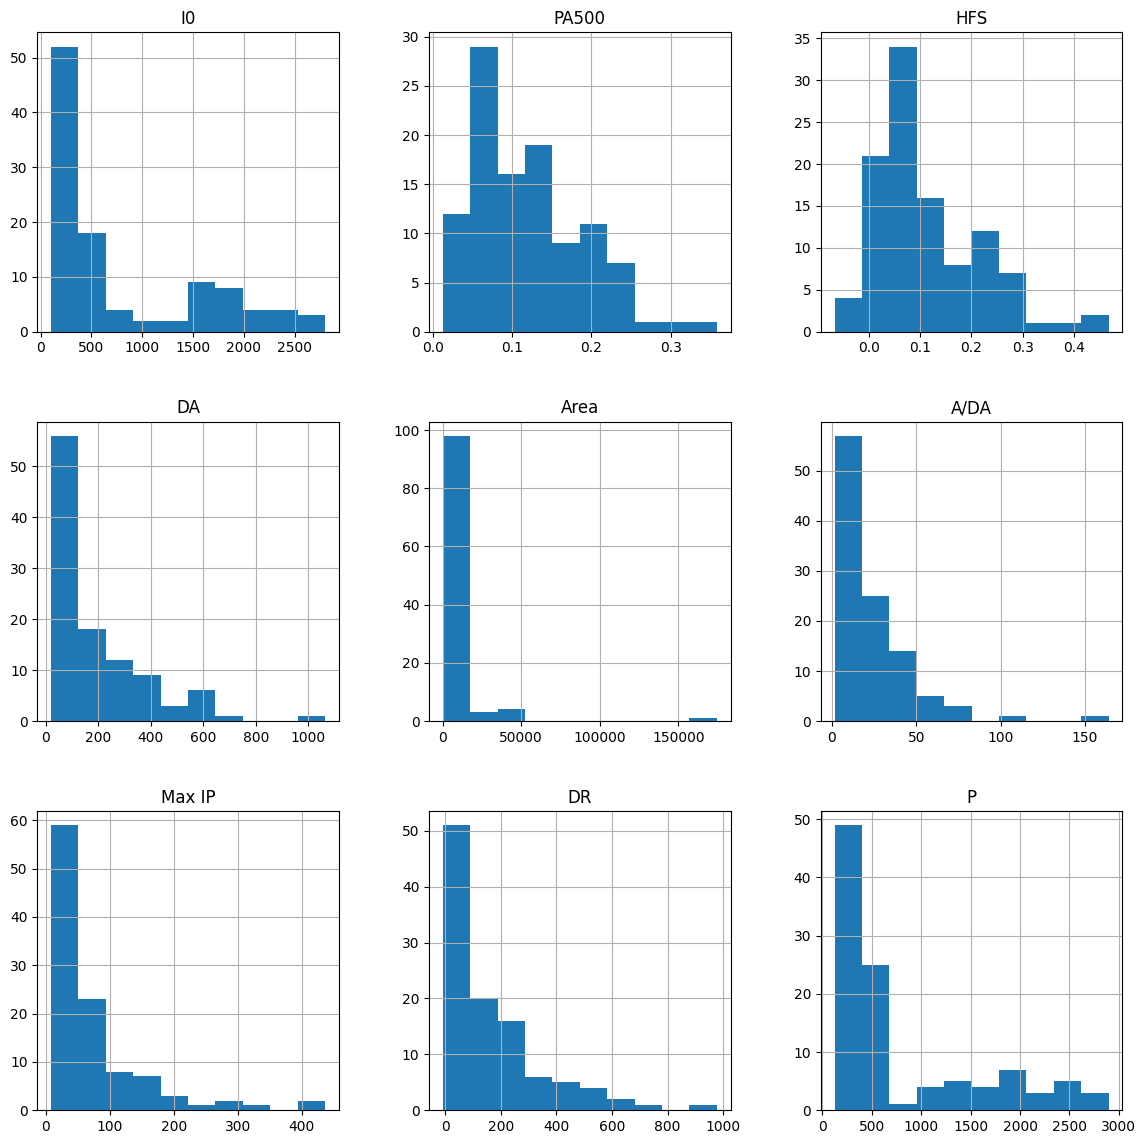

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(14, 14))
plt.show()

### **4. OUTLIER**

Outlier pada dataset adalah nilai yang secara signifikan berbeda dari sebagian besar data lainnya dalam kumpulan data. Mereka bisa jauh lebih besar atau lebih kecil daripada sebagian besar nilai dalam dataset. \

Dampak dari adanya outlier pada data adalah : \
1. Outlier dapat mempengaruhi metrik statistik, alhasil mereka tidak mencerminkan dengan baik pusat atau sebaran sebenarnya dari sebagian besar data.
2. Outlier bisa membuat analisis menjadi tidak akurat karena nilai yang sangat jauh dari nilai sebagian besar data dapat mempengaruhi model atau analisis yang dilakukan.
3. Outlier dapat memiliki pengaruh yang besar pada model regresi, membuat garis regresi atau prediksi menjadi tidak representatif atau akurat; dan masih banyak lagi. \

Salah satu metode yang lebih robust (lebih baik atau konsisten) adalah menggunakan metode interquartile range (IQR) untuk mengidentifikasi outlier.

Rumus dari metode IQR adalah sebagai berikut : \
$$ \text{IQR} = Q3 - Q1 $$

Di mana : \
$ Q1 $ adalah kuartil pertama (25 persen) \
$ Q3 $ adalah kuartil ketiga (75 persen) \

Adapun langkah - langkah dalam menghitung IQR : \
1. Hitung nilai IQR.
2. Tentukan batas atas dan batas bawah untuk outlier:
   - Batas bawah: $ Q1 - 1.5 \times \text{IQR} $
   - Batas atas: $ Q3 + 1.5 \times \text{IQR} $
3. Data di luar rentang ini dianggap sebagai outlier.



In [ ]:
import pandas as pd

# Identifikasi outlier menggunakan metode IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Menampilkan jumlah outlier
jumlah_outlier = outliers.sum()
print(f"Jumlah outlier: {jumlah_outlier}")

Jumlah outlier: 20


<ipython-input-6-3034b4ebd932>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-6-3034b4ebd932>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-6-3034b4ebd932>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


### **5. DATA DUPLIKAT**

Data duplikat merujuk pada baris dalam dataset yang memiliki nilai yang sama untuk semua kolom atau atribut yang diidentifikasi. Baris-baris ini dianggap memiliki nilai yang sama persis di semua kolomnya dengan baris lain dalam dataset yang sama. Duplikat data bisa terjadi karena entri data yang sama bisa tercatat lebih dari sekali.

In [ ]:
# Identifikasi data duplikat
duplicated_data = df[df.duplicated()]

# Menampilkan jumlah data duplikat
jumlah_duplikat = len(duplicated_data)
print("Jumlah data yang duplikat:", jumlah_duplikat)

# Menampilkan baris data duplikat beserta jumlahnya
if jumlah_duplikat > 0:
    print("\nData yang duplikat:")
    print(duplicated_data)
else:
    print("\nTidak ada data yang duplikat.")

Jumlah data yang duplikat: 1

Data yang duplikat:
   Class     I0     PA500       HFS         DA        Area       A/DA  \
60   gla  197.0  0.132645  0.074002  33.460653  409.647141  12.242652   

       Max IP         DR           P  
60  26.992807  19.773813  231.783788  


### **6. IMBALANCING**

In [ ]:
df.Class.value_counts()

adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: Class, dtype: int64

Dari hasil di atas, data tiap kelas sedikit tidak seimbang, maka dari itu bisa dilanjut ke proses selanjutnya tanpa melakukan **balancing data**. Terkadang, ketidakseimbangan kelas pada data adalah cerminan dari dunia nyata di mana satu kelas memang jauh lebih umum daripada yang lain. Memaksakan keseimbangan bisa menghapus informasi penting yang ada dalam data. \

**Catatan :** \
Balancing data dilakukan apabila perbedaan jumlah data tiap kelas terlalu jomplang/besar.

### **7. REKAP DATA UNDERSTANDING**

Dari Data Understanding di atas, dapat disimpulkan bahwa :
1. Tidak ditemukan missing value (dataset sudah bagus).
2. Terdapat outlier sebanyak 44 data.
3. Terdapat data duplikat.
4. Jumlah data setiap kelas sedikit tidak seimbang (imbalance), jadi tidak diperlukan balancing data. \

Maka dari itu bisa dilakukan beberapa penanganan seperti :
1. Penanganan pada outlier.
2. Penanganan pada data duplikat

## **PREPROCESSING**

Tahap preprocessing data adalah serangkaian langkah atau proses yang dilakukan pada data mentah sebelum data tersebut dimasukkan ke dalam model. Ini bertujuan untuk membersihkan, menyesuaikan, dan mempersiapkan data yang akan dipakai. Beberapa tahap umum dalam preprocessing data meliputi:

1. **Pembersihan Data (Data Cleaning):** Identifikasi dan penanganan terhadap data yang hilang, tidak lengkap, atau tidak relevan. Ini bisa berupa mengisi nilai yang hilang (imputasi), menghapus baris atau kolom yang tidak relevan, atau menggunakan teknik lain untuk menangani nilai yang hilang. \
2. **Transformasi Data:** Melibatkan normalisasi atau standarisasi data, seperti scaling fitur ke dalam rentang tertentu, agar tidak ada fitur yang mendominasi yang lain. \
3. **Reduksi Dimensi (Dimensionality Reduction):** Ketika data memiliki banyak fitur (dimensi), teknik seperti PCA (Principal Component Analysis) atau seleksi fitur digunakan untuk mengurangi jumlah fitur tanpa kehilangan informasi penting. Ini dapat membantu dalam meningkatkan efisiensi dan mengurangi overfitting. \
4. **Encoding Data Kategorikal:** Mengubah data kategorikal menjadi bentuk numerik yang dapat dipahami oleh model. Contohnya adalah menggunakan teknik seperti One-Hot Encoding atau Label Encoding. \
5. **Pemisahan Data:** Memisahkan dataset menjadi data pelatihan dan data uji untuk mengevaluasi kinerja model. \
6. **Penanganan Outlier:** Mendeteksi dan menangani nilai-nilai ekstrem yang mungkin mempengaruhi performa model. \
7. **Sampling:** Jika ada ketidakseimbangan kelas, teknik seperti oversampling (menambah sampel pada kelas minoritas) atau undersampling (mengurangi sampel pada kelas mayoritas) dapat digunakan. \
8. **Validasi Data:** Memastikan integritas data sepanjang proses preprocessing untuk menghindari masalah yang mungkin timbul.

Tentu dari tahapan umum di atas, kita tidak diharuskan untuk memakai semuanya dikarenakan kita juga harus menyesuaikan dengan data yang kita pakai.

Preprocessing data memiliki beberapa manfaat yang sangat penting di antaranya adalah sebagai berikut :

1. **Meningkatkan Kualitas Data:** Proses preprocessing membantu membersihkan data dari nilai yang hilang, tidak valid, atau tidak relevan. Ini meningkatkan kualitas data yang digunakan untuk melatih model. \
2. **Mengurangi Overfitting:** Dengan melakukan normalisasi, reduksi dimensi, atau teknik lainnya, preprocessing membantu mengurangi kompleksitas model dan kecenderungan untuk overfitting (ketika model terlalu "menghafal" data latih dan tidak bisa menggeneralisasi ke data baru). \
3. **Mengoptimalkan Kinerja Model:** Dengan memastikan data yang bersih, terstruktur, dan relevan, preprocessing membantu model untuk belajar pola yang lebih baik dari data dan menghasilkan prediksi yang lebih akurat. \
4. **Mempercepat Proses Pembelajaran:** Melakukan normalisasi atau standarisasi data dapat membantu dalam mempercepat konvergensi algoritma pembelajaran mesin, yang berarti model dapat belajar dengan lebih cepat dan efisien. \
5. **Menangani Data Tidak Seimbang:** Teknik preprocessing dapat membantu menangani ketidakseimbangan kelas dalam dataset, yang penting terutama dalam kasus klasifikasi di mana ada perbedaan besar antara jumlah sampel untuk setiap kelas. \
6. **Memperbaiki Kualitas Prediksi:** Dengan membersihkan data, menangani outlier, dan melakukan transformasi yang tepat, preprocessing membantu dalam meningkatkan akurasi, recall, dan presisi prediksi yang dihasilkan oleh model. \
7. **Meningkatkan Efisiensi Algoritma:** Reduksi dimensi, penghapusan fitur yang tidak relevan, atau teknik lainnya dapat meningkatkan efisiensi algoritma dengan mengurangi kompleksitas dan waktu komputasi. \
8. **Menyederhanakan Pemahaman Data:** Proses preprocessing membantu untuk menyederhanakan dan menormalkan data sehingga lebih mudah untuk dipahami dan dianalisis.

Dengan demikian, preprocessing data merupakan tahap yang krusial, karena dapat mempengaruhi secara signifikan kinerja dan kehandalan model yang dihasilkan. \

Yang akan dibahas dalam preprocessing kali ini adalah sebagai berikut : \
1. Penanganan Outlier
2. Penanganan Data Duplikat
3. Feature Selection
4. Normalisasi
5. Spliting Data

### **1. PENANGANAN OUTLIER**

Salah satu cara untuk menangani outlier adalah dengan melakukan dropping outlier atau dikenal dengan menghapus data yang diidentifikasi sebagai outlier dalam dataset.

In [ ]:
import pandas as pd

# Menghilangkan outlier dari dataset
df_tanpa_outlier = df[~outliers]

# Menampilkan dataset tanpa outlier
print("\nDataset tanpa outlier:")
print(df_tanpa_outlier)


Dataset tanpa outlier:
    Class           I0     PA500       HFS          DA          Area  \
0     car   524.794072  0.187448  0.032114  228.800228   6843.598481   
1     car   330.000000  0.226893  0.265290  121.154201   3163.239472   
2     car   551.879287  0.232478  0.063530  264.804935  11888.391827   
3     car   380.000000  0.240855  0.286234  137.640111   5402.171180   
4     car   362.831266  0.200713  0.244346  124.912559   3290.462446   
..    ...          ...       ...       ...         ...           ...   
90    adi  1850.000000  0.079149  0.069470  253.621455  13113.203095   
93    adi  1900.000000  0.054454  0.113795  272.618029   7481.593470   
94    adi  1800.000000  0.069115  0.157080  385.564704  13831.724889   
96    adi  1650.000000  0.047647  0.043284  274.426177   5824.895192   
103   adi  1600.000000  0.071908 -0.066323  436.943603  12655.342135   

          A/DA      Max IP          DR            P  
0    29.910803   60.204880  220.737212   556.828334  
1  

Menyimpan dataset tanpa outlier :

In [ ]:
# Menyimpan dataset tanpa outlier ke dalam file CSV
df_tanpa_outlier.to_csv('BreastTissue_No_Outlier.csv', index=False)

In [ ]:
df_tanpa_outlier

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
90,adi,1850.000000,0.079149,0.069470,253.621455,13113.203095,51.703840,160.065460,196.730498,1916.985365
93,adi,1900.000000,0.054454,0.113795,272.618029,7481.593470,27.443502,138.359268,234.898496,1924.517895
94,adi,1800.000000,0.069115,0.157080,385.564704,13831.724889,35.873940,157.570007,351.897477,1823.032364
96,adi,1650.000000,0.047647,0.043284,274.426177,5824.895192,21.225727,81.239571,262.125656,1603.070348


### **2. PENANGANAN DATA DUPLIKAT**

Untuk menangani data duplikat kita juga bisa menghapus data tersebut dari dataset.

In [ ]:
# Memakai df_tanpa_outlier, karena telah menghapus outlier
jumlah_duplikat = df_tanpa_outlier.duplicated().sum()

# Menghapus data yang duplikat
data_bersih = df_tanpa_outlier.drop_duplicates()

print("Banyaknya data : ", data_bersih.shape)

Banyaknya data :  (85, 10)


Menyimpan dataset tanpa outlier dan duplikat data :

In [ ]:
# Menyimpan dataset tanpa data duplikat ke dalam file CSV
data_bersih.to_csv('BreastTissue_No_Outlier_No_Duplikat.csv', index=False)

In [ ]:
data_bersih

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
90,adi,1850.000000,0.079149,0.069470,253.621455,13113.203095,51.703840,160.065460,196.730498,1916.985365
93,adi,1900.000000,0.054454,0.113795,272.618029,7481.593470,27.443502,138.359268,234.898496,1924.517895
94,adi,1800.000000,0.069115,0.157080,385.564704,13831.724889,35.873940,157.570007,351.897477,1823.032364
96,adi,1650.000000,0.047647,0.043284,274.426177,5824.895192,21.225727,81.239571,262.125656,1603.070348


### **3. FEATURE SELECTION**

Feature selection (seleksi fitur) adalah proses memilih subset fitur yang paling relevan atau informatif dari sekumpulan fitur yang tersedia dalam dataset. Tujuannya adalah untuk mengurangi kompleksitas model, meningkatkan akurasi, mempercepat waktu komputasi, dan menghindari overfitting dengan menggunakan hanya fitur-fitur yang paling penting atau relevan dalam pembuatan prediksi. \
**Kali ini memakai Mutual Information**.


Metode Mutual Information adalah salah satu teknik yang digunakan dalam pemilihan fitur untuk menentukan seberapa informatif atau berkorelasi suatu fitur dengan variabel target dalam dataset. \
Dalam konteks pemilihan fitur, Mutual Information mengukur seberapa banyak informasi dari fitur-fitur yang terkandung dalam variabel target. \
Berikut adalah rumus dari Mutual Information : \
$$ I(X;Y) = \sum_{x \in X} \sum_{y \in Y} P(x, y) \cdot \log \left( \frac{P(x, y)}{P(x) \cdot P(y)} \right) $$

Dimana : \
- $I(X;Y)$ adalah Mutual Information antara variabel $X$ dan $Y$
- $p(x,y)$ adalah probabilitas bersama dari $X$ dan $Y$.
- $p(x)$ dan $p(y)$ adalah probabilitas marginal dari $X$ dan $Y$ masing - masing. \

Berikut langkah-langkah dalam perhitungan Mutual Information antara dua variabel acak $( X )$ dan $( Y )$:

1. **Hitung Probabilitas Marginal:**
   - Hitung probabilitas marginal untuk setiap variabel. Misalnya, $( P(x))$ adalah probabilitas munculnya nilai x untuk variabel $( X )$, dan $( P(x))$ adalah probabilitas munculnya nilai y untuk variabel $( Y )$. \
2. **Hitung Probabilitas Bersama:**
   - Hitung probabilitas bersama $( P(x, y) )$, yaitu probabilitas bahwa variabel $( X )$ mengambil nilai x dan variabel $( Y )$ mengambil nilai y pada saat yang sama. \
3. **Gunakan Rumus Mutual Information:**
   - Gunakan rumus Mutual Information dengan nilai probabilitas yang telah dihitung sebelumnya. \
4. **Perhitungan Total Mutual Information:**
   - Jumlahkan nilai hasil dari rumus Mutual Information untuk semua nilai yang mungkin dari $( X )$ dan $( Y )$ (semua kombinasi nilai dari variabel). \


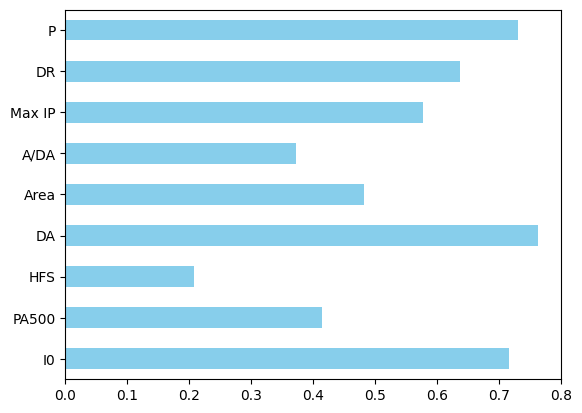

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = data_bersih.drop(columns=['Class'])  # Fitur
y = data_bersih['Class']  # Target

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.plot(kind='barh', color='skyblue')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Pisahkan fitur dan target
X = data_bersih.drop(columns=['Class'])  # Fitur
y = data_bersih['Class']  # Target

# Inisialisasi SelectKBest dengan mutual_info_classif sebagai skor fungsi
# Pilih k fitur terbaik
k_best = SelectKBest(mutual_info_classif, k='all')

# Terapkan seleksi pada data
X_new = k_best.fit_transform(X, y)

# Dapatkan peringkat fitur
feature_ranks = k_best.scores_

# Gabungkan nama fitur dan peringkatnya
feature_rank_df = pd.DataFrame({'Feature': X.columns, 'Rank': feature_ranks})

# Urutkan berdasarkan peringkat
feature_rank_df = feature_rank_df.sort_values(by='Rank', ascending=False)

# Tampilkan hasil
print(feature_rank_df)

  Feature      Rank
3      DA  0.762234
8       P  0.729748
0      I0  0.712739
7      DR  0.637397
6  Max IP  0.576558
4    Area  0.482531
1   PA500  0.413654
5    A/DA  0.371851
2     HFS  0.209974


### **4. NORMALISASI MINMAX**

Normalisasi Min-Max adalah teknik normalisasi yang digunakan dalam pre-processing data untuk mengubah nilai fitur menjadi rentang tertentu. Tujuannya adalah untuk membawa nilai-nilai fitur ke dalam rentang yang spesifik, biasanya antara 0 dan 1, tetapi bisa juga rentang lain yang diinginkan.

Langkah-langkah normalisasi Min-Max:

1. Pilih rentang: Biasanya, rentang yang dipilih adalah antara 0 dan 1.
2. Hitung nilai minimum dan maksimum: Temukan nilai minimum (min) dan maksimum (max) dari setiap fitur yang akan dinormalisasi.
3. Gunakan rumus normalisasi Min-Max: Untuk setiap nilai fitur xx, terapkan rumus normalisasi Min-Max:

Rumus normalisasi Min-Max:

$$ X' = \frac{X - min}{max - min} $$

di mana:
- $X'$ adalah nilai fitur yang telah dinormalisasi,
- $min$ adalah nilai minimum dari fitur,
- $max$ adalah nilai maksimum dari fitur, dan
- $X$ adalah nilai asli dari fitur.



**Contoh :** \

| X | X' |
|-----|------|
| 20  | 0.5  |
| 30  | 1    |
| 15  | 0.25 |
| 25  | 0.75 |
| 10  | 10   |

Langkah-langkah normalisasi Min-Max untuk kolom Nilai:
1. Temukan nilai minimum (min) dan nilai maksimum (max) dari kolom Nilai.
   - \(min = 10\)
   - \(max = 30\)
2. Gunakan rumus normalisasi Min-Max untuk setiap nilai dalam kolom Nilai: \

- Untuk \($X$ = 20\): \
  $X'$ = $\frac{20 - 10}{30 - 10}$ = $\frac{10}{20}$ = 0.5

- Untuk \($X$ = 30\): \
  $X'$ = $\frac{30 - 10}{30 - 10}$ = $\frac{20}{20}$ = 1

- Untuk \($X$ = 15\): \
  $X'$ = $\frac{15 - 10}{30 - 10}$ = $\frac{5}{20}$ = 0.25

- Untuk \($X$ = 25\): \
  $X'$ = $\frac{25 - 10}{30 - 10}$ = $\frac{15}{20}$ = 0.75

- Untuk \($X$ = 10\): \
   $X'$ = $\frac{10 - 10}{30 - 10}$ = $\frac{0}{20}$ = 0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_norm = pd.read_csv('/content/drive/MyDrive/PSDKris3/BreastTissue_No_Outlier_No_Duplikat.csv')
X=data_norm.drop(columns=['Class'], axis =1)
y=data_norm['Class']

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Membuat DataFrame dari data yang telah dinormalisasi
data_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
data_normalized

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,0.211214,0.573143,0.270633,0.501209,0.408754,0.565080,0.343440,0.504250,0.221683
1,0.113671,0.702286,0.911708,0.243248,0.186648,0.489212,0.405982,0.218955,0.141294
2,0.224777,0.720571,0.357006,0.587490,0.713202,0.864115,0.459080,0.581753,0.272986
3,0.138708,0.748000,0.969290,0.282755,0.321765,0.751431,0.531173,0.233292,0.189278
4,0.130111,0.616571,0.854127,0.252255,0.194326,0.493860,0.403826,0.230169,0.153907
...,...,...,...,...,...,...,...,...,...
80,0.874812,0.218566,0.373337,0.560690,0.787118,1.000000,1.000000,0.447950,0.919898
81,0.899850,0.137714,0.495202,0.606213,0.447256,0.515840,0.857287,0.537460,0.923764
82,0.849775,0.185714,0.614203,0.876877,0.830480,0.684085,0.983593,0.811842,0.871668
83,0.774662,0.115429,0.301344,0.610546,0.347276,0.391753,0.481738,0.601312,0.758754


Menyimpan normalisasi :

In [ ]:
import pickle

file = '/content/drive/MyDrive/PSDKris3/Data_Normalisasi_MinMax.pkl'

# Menyimpan zcore dalam file pickle
with open(file, 'wb') as file:
    pickle.dump(scaler, file)

Menyimpan dataset yang telah dinormalisasi :

In [ ]:
# Menyimpan data yang telah dinormalisasi dalam satu file CSV
data_normalized.to_csv('BreastTissue_No_Outllier_Normalisasi.csv', index=False)

### **5. SPLITING DATA**

Splitting data adalah proses membagi dataset menjadi subset yang lebih kecil. \

Ada dua jenis pembagian data utama:

  1. **Data Training :** Adalah bagian dari dataset yang digunakan untuk melatih model mesin atau untuk membangun model prediktif. Model menggunakan informasi dari training set untuk belajar pola-pola yang ada dalam data. \

  2. **Data Testing :** Adalah bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih. \

Kali ini total semua data akan dibagi menjadi 80% untuk data latih (data training) dan 20% untuk data uji (data test). Juga dataset dibagi menjadi fitur dan target, di mana kolom 'Class' termasuk target dan kolom selain 'Class' termasuk dalam fitur.

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
# X=data_bersih.drop(columns=['Class', 'HFS', 'A/DA', 'PA500', 'Area', 'Max IP', 'DR'], axis =1)
# X=data_bersih.drop(columns=['Class', 'HFS', 'A/DA', 'PA500', 'Area', 'Max IP'], axis =1)
# X=data_bersih.drop(columns=['Class', 'HFS', 'A/DA', 'PA500', 'Area'], axis =1)
# X=data_bersih.drop(columns=['Class', 'HFS', 'A/DA', 'PA500'], axis =1)
# X=data_bersih.drop(columns=['Class', 'HFS', 'A/DA'], axis =1)
# X=data_bersih.drop(columns=['Class', 'HFS'], axis =1)
X=data_norm.drop(columns=['Class'], axis =1)
y=data_norm['Class']

# membagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# banyaknya data uji data data testing
print("Jumlah Data : ", X.shape[0])
print("Data Latih  : ", X_train.shape[0])
print("Data Uji    : ", X_test.shape[0])

Jumlah Data :  85
Data Latih  :  68
Data Uji    :  17


## **MODELING**

Tahap modeling adalah saat di mana kita membangun model atau algoritma untuk menggambarkan pola-pola dalam data atau untuk membuat prediksi berdasarkan data yang ada. Ini melibatkan penggunaan teknik-teknik statistik atau pembelajaran mesin untuk membuat representasi dari data yang dapat digunakan untuk membuat prediksi, klasifikasi, klaster, atau estimasi. \

Yang akan dibahas dalam tahap modeling kali ini adalah : \
1. Perbandingan akurasi antara 4 model, yaitu KNN, Decission Tree, Random Forest, dan Naive Bayes.
2. Pemilihan Model Terbaik.
3. Modeling Dengan Model Terbaik.

### **1. Perbandingan Akurasi 4 Model**

#### **KNN (K-NEAREST NEIGHBORS)**

K-Nearest Neighbors (KNN) adalah salah satu algoritma yang digunakan dalam machine learning untuk tugas klasifikasi dan regresi. Ide dasar di balik KNN adalah melakukan prediksi berdasarkan keadaan mayoritas tetangga terdekat dari suatu titik data. \

Konsep utama KNN adalah sebagai berikut:

  1. **Penentuan Jarak:** Mengukur jarak antara titik data yang ingin diprediksi dengan titik-titik data lainnya. Metrik jarak yang umum digunakan adalah Euclidean distance atau Manhattan distance, tetapi bisa juga menggunakan metrik jarak lainnya tergantung pada kasusnya.

  2. **Pemilihan Tetangga Terdekat:** Memilih k titik data terdekat (k adalah bilangan bulat positif yang ditentukan sebelumnya) dari titik data yang ingin diprediksi berdasarkan metrik jarak.

  3. **Klasifikasi:** Untuk tugas klasifikasi, mayoritas label k tetangga terdekat digunakan untuk menentukan label dari titik data yang ingin diprediksi. Misalnya, jika mayoritas dari tetangga terdekat adalah label A, maka titik data yang diprediksi akan diklasifikasikan sebagai label A.

  4. **Regresi:** Untuk tugas regresi, nilai rata-rata atau median dari nilai-nilai k tetangga terdekat digunakan sebagai prediksi nilai untuk titik data yang ingin diprediksi. \


Langkah-langkah menghitung KNN : \

  1. **Pilih bilangan bulat positif k:** Ini adalah jumlah tetangga terdekat yang akan diambil untuk menentukan prediksi. Nilai k harus dipilih sebelumnya dan dapat memengaruhi kinerja model.

  2. **Hitung Jarak:** Hitung jarak antara titik data yang ingin diprediksi dengan semua titik data dalam set pelatihan. Metrik jarak yang umum digunakan adalah Euclidean distance atau Manhattan distance. Jarak dihitung dengan rumus sebagai berikut (untuk Euclidean distance):
  $ \text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $ \

  Di mana : \
  $n$ adalah jumlah fitur  
  $ xi $​ dan $yi $​ adalah nilai fitur ke-i dari dua titik data.

  3. Pilih k Tetangga Terdekat: Identifikasi k tetangga terdekat berdasarkan jarak yang dihitung sebelumnya.

  4. Tentukan Mayoritas: Untuk tugas klasifikasi, tentukan label mayoritas dari k tetangga terdekat. Untuk tugas regresi, hitung nilai rata-rata atau median dari k tetangga terdekat. \
  
  Rumus untuk prediksi pada tugas klasifikasi bisa direpresentasikan sebagai berikut: \

  $ \hat{y} = \text{argmax}\left(\sum_{i=1}^{k} I(y_i = c)\right) $

  Di mana : \
  $\text{argmax}$ mengambil kelas yang memiliki jumlah tetangga terbanyak. \
  $\hat{y}$​ adalah label yang diprediksi. \
  $ I $ adalah fungsi indikator (1 jika benar, 0 jika salah). \
  $y_i$​ adalah label dari tetangga ke-i. \
  $ c $ adalah label kelas. \

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Misal X adalah dataset fitur dan y adalah label/target
# Sesuaikan X dan y dengan dataset Anda
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_k = 0

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Akurasi: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"K terbaik : {best_k} dengan akurasi : {best_accuracy}")

k = 1, Akurasi: 0.7647058823529411
k = 2, Akurasi: 0.6470588235294118
k = 3, Akurasi: 0.5882352941176471
k = 4, Akurasi: 0.5882352941176471
k = 5, Akurasi: 0.5294117647058824
k = 6, Akurasi: 0.5882352941176471
k = 7, Akurasi: 0.5294117647058824
k = 8, Akurasi: 0.4117647058823529
k = 9, Akurasi: 0.35294117647058826
k = 10, Akurasi: 0.47058823529411764
k = 11, Akurasi: 0.5294117647058824
k = 12, Akurasi: 0.47058823529411764
k = 13, Akurasi: 0.47058823529411764
k = 14, Akurasi: 0.4117647058823529
k = 15, Akurasi: 0.47058823529411764
k = 16, Akurasi: 0.47058823529411764
k = 17, Akurasi: 0.47058823529411764
k = 18, Akurasi: 0.5294117647058824
k = 19, Akurasi: 0.5294117647058824
k = 20, Akurasi: 0.5294117647058824
k = 21, Akurasi: 0.5294117647058824
k = 22, Akurasi: 0.5294117647058824
k = 23, Akurasi: 0.47058823529411764
k = 24, Akurasi: 0.47058823529411764
k = 25, Akurasi: 0.47058823529411764
k = 26, Akurasi: 0.47058823529411764
k = 27, Akurasi: 0.4117647058823529
k = 28, Akurasi: 0.4117647

#### **DECISION TREE**

Pohon Keputusan (Decision Tree) adalah model prediktif yang menggunakan struktur berbentuk pohon atau hirarki aturan untuk membuat prediksi tentang nilai dari target variabel berdasarkan serangkaian aturan pembelajaran dari fitur-fitur data. \

Pohon keputusan terdiri dari simpul (nodes) dalam bentuk keputusan, cabang (branches) yang mewakili hasil dari keputusan tersebut, dan daun (leaves) yang mewakili nilai target atau prediksi. Proses membangun pohon keputusan melibatkan pemilihan atribut terbaik di setiap tingkat pohon yang memecah data menjadi kelompok yang lebih homogen. \

Langkah-langkah utama dalam pembuatan pohon keputusan termasuk:

  1. **Pemilihan Atribut:** Memilih atribut terbaik untuk memecah data. Biasanya, kriteria seperti Information Gain, Gini Impurity, atau Gain Ratio digunakan untuk menentukan atribut yang paling informatif.

  2. **Pembagian Data:** Memisahkan data berdasarkan nilai-nilai atribut yang dipilih pada langkah pertama.

  3. **Rekursif:** Proses pembagian ini dilakukan secara rekursif pada setiap percabangan (branch) hingga mencapai kondisi berhenti. Kondisi berhenti dapat berupa node daun yang mewakili prediksi atau jika tidak ada lagi fitur yang memberikan pemisahan yang signifikan.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Memisahkan data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model Decision Tree Classifier
dc = DecisionTreeClassifier()

# Melatih model dengan data latih
dc.fit(X_train, y_train)

# Memprediksi kelas untuk data uji
y_pred = dc.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.5294117647058824


### **RANDOM FOREST**

Random Forest adalah salah satu algoritma machine learning yang menggunakan konsep ensemble learning untuk meningkatkan kinerja prediksi dan mengurangi overfitting. Random Forest menggabungkan sejumlah besar pohon keputusan (Decision Trees) yang bekerja bersama untuk membuat prediksi yang lebih akurat dan stabil. \

Mari kita fokus pada beberapa langkah penting dalam proses pembentukan Random Forest:

  1. Bagging (Bootstrap Aggregating):
      - Bagging melibatkan pengambilan sampel dataset pelatihan dengan pengembalian. Ini berarti setiap pohon dibangun dengan dataset yang diambil secara acak dari dataset pelatihan asli.
      - Jumlah sampel yang diambil biasanya sama dengan ukuran dataset pelatihan, tetapi setiap sampel memiliki sebagian data yang unik karena pengambilan dilakukan dengan pengembalian.

  2. Pemilihan Atribut Acak:
      - Ketika membangun setiap pohon keputusan dalam Random Forest, algoritma memilih secara acak subset dari atribut untuk digunakan dalam pembentukan pohon tersebut.
      - Hal ini membantu mencegah setiap pohon menjadi terlalu terfokus pada beberapa atribut tertentu dan membuatnya lebih umum dan variasi antar pohon lebih besar.

  3. Prediksi Bersama-sama:
      - Setelah sejumlah besar pohon keputusan dibangun, prediksi dihasilkan dengan mengambil mayoritas suara dari prediksi setiap pohon (klasifikasi) atau rata-rata prediksi (regresi).

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Memisahkan data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi nilai awal
accuracies = []
best_accuracy = 0
best_n_estimators = 0

# Coba berbagai nilai n_estimators
for n_estimators in range(1, 101):  # Ubah rentang sesuai kebutuhan Anda
    # Inisialisasi model Random Forest Classifier dengan n_estimators saat ini
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Melatih model dengan data latih
    rf.fit(X_train, y_train)

    # Memprediksi kelas untuk data uji
    y_pred = rf.predict(X_test)

    # Mengukur akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan nilai akurasi dan n_estimators ke dalam list accuracies
    accuracies.append((n_estimators, accuracy))

    # Memperbarui nilai terbaik jika ditemukan akurasi yang lebih tinggi
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

# Menampilkan akurasi untuk setiap n_estimators
for n_estimators, accuracy in accuracies:
    print(f"n_estimators: {n_estimators}, Akurasi: {accuracy}")

# Menampilkan n_estimators terbaik dan akurasinya
print("n_estimators terbaik:", best_n_estimators)
print("Akurasi terbaik:", best_accuracy)

n_estimators: 1, Akurasi: 0.7058823529411765
n_estimators: 2, Akurasi: 0.6470588235294118
n_estimators: 3, Akurasi: 0.7058823529411765
n_estimators: 4, Akurasi: 0.7647058823529411
n_estimators: 5, Akurasi: 0.7647058823529411
n_estimators: 6, Akurasi: 0.7647058823529411
n_estimators: 7, Akurasi: 0.8235294117647058
n_estimators: 8, Akurasi: 0.8235294117647058
n_estimators: 9, Akurasi: 0.7647058823529411
n_estimators: 10, Akurasi: 0.7647058823529411
n_estimators: 11, Akurasi: 0.8235294117647058
n_estimators: 12, Akurasi: 0.8235294117647058
n_estimators: 13, Akurasi: 0.7647058823529411
n_estimators: 14, Akurasi: 0.8235294117647058
n_estimators: 15, Akurasi: 0.7647058823529411
n_estimators: 16, Akurasi: 0.7647058823529411
n_estimators: 17, Akurasi: 0.8235294117647058
n_estimators: 18, Akurasi: 0.7647058823529411
n_estimators: 19, Akurasi: 0.8235294117647058
n_estimators: 20, Akurasi: 0.8235294117647058
n_estimators: 21, Akurasi: 0.8235294117647058
n_estimators: 22, Akurasi: 0.82352941176470

### **NAIVE BAYES**

Naive Bayes adalah metode yang bekerja dengan mengasumsikan independensi antara fitur-fitur dalam data, meskipun seringkali asumsi ini tidak sepenuhnya sesuai dengan kondisi dunia nyata. Meskipun begitu, metode ini sering memberikan hasil yang baik, khususnya dalam kasus-kasus yang melibatkan dataset yang besar. \

Cara kerja metode Naive Bayes adalah sebagai berikut : \
1. Teorema Bayes: \
  Naive Bayes berdasarkan pada Teorema Bayes, yang menyatakan hubungan antara probabilitas posterior (P(kelas∣fitur)P(kelas∣fitur)), probabilitas prior (P(kelas)P(kelas)), dan likelihood (P(fitur∣kelas)P(fitur∣kelas)) dari suatu sampel data.
    
  $ P(\text{kelas} | \text{fitur}) = \frac{P(\text{fitur} | \text{kelas}) \times P(\text{kelas})}{P(\text{fitur})} $
​

2. Asumsi Naive (Naive Assumption): \
  Naive Bayes mengasumsikan bahwa setiap fitur dalam data adalah independen satu sama lainnya jika diketahui kelasnya. Asumsi ini sering disebut sebagai "naive" karena dalam dunia nyata, fitur-fitur tidak selalu independen. \

3. Perhitungan Probabilitas: \
  **Probabilitas Prior** $ \text{P(kelas)} $: Probabilitas awal dari setiap kelas dalam dataset. \
  **Likelihood** $ \text{P(fitur∣kelas)} $: Probabilitas munculnya fitur-fitur tertentu jika diketahui kelasnya. Ini dihitung berdasarkan data pelatihan. \
  **Probabilitas Posterior** $ P(\text{kelas} | \text{fitur}) $: Probabilitas kelas tertentu untuk sampel data yang diberikan.

4. Prediksi: \
  Setelah menghitung probabilitas posterior untuk setiap kelas, Naive Bayes memilih kelas dengan probabilitas tertinggi sebagai prediksi untuk sampel data tersebut.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Memisahkan data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model Naive Bayes
nb = GaussianNB()

# Melatih model dengan data latih
nb.fit(X_train, y_train)

# Memprediksi kelas untuk data uji
y_pred = nb.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.6470588235294118


### **PEMILIHAN MODEL TERBAIK**

Dengan dijalankannya keempat model di atas, yakni : \
- KNN \
- Decision Tree \
- Random Forest \
- Naive Bayes \

Didapatlah model terbaik dalah model **Random Forest** dengan : \
Akurasi terbaik Random Forest: **0.8461538461538461** untuk n estimator bernilai 7\
Kombinasi fitur optimal Random Forest adalah semua fitur terpakai: **['DA', 'P', 'I0', 'DR', 'Max IP', 'Area', 'PA500', 'A/DA', 'HFS']** \

Sebenarnya tidak diperlukan untuk melakukan reduksi fitur dikarenakan jumlah fitur yang terbilang sedikit, ditambah saya coba-coba untuk melakukan reduksi fitur secara manual ternyata hasil akurasi tertinggi didapat ketika jumlah fitur masih utuh (jumlah fitur awal).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# datanya = pd.read_csv('/content/drive/MyDrive/PSDKris3/BreastTissue_No_Outlier_No_Duplikat.csv')

with open('Data_Normalisasi_MinMax.pkl', 'rb') as file:
    scaler = pickle.load(file)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Classifier dengan n_estimators=7
rf = RandomForestClassifier(n_estimators=7, random_state=42)

# Melatih model dengan data latih
rf.fit(X_train, y_train)

# Memprediksi kelas untuk data uji
y_pred = rf.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)

Akurasi: 0.8235294117647058


In [ ]:
# Menyimpan model terbaik
with open('model_terbaik_rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

## **EVALUASI MODEL**

Tahap evaluasi adalah proses mengevaluasi kinerja model yang telah dibuat terhadap dataset yang baru atau data yang tidak terlihat sebelumnya. Tujuannya adalah untuk menentukan seberapa baik model dapat melakukan prediksi atau menyelesaikan tugas tertentu berdasarkan performa yang diukur dengan metrik tertentu. \

Proses evaluasi ini penting karena memberikan wawasan tentang seberapa baik model akan berkinerja dalam situasi nyata atau pada data baru yang belum pernah dilihat sebelumnya. Adapun metrik evaluasi adalah sebagai berikut : \

1. Akurasi (Accuracy) : \
  Akurasi (accuracy) adalah salah satu metrik yang mengukur seberapa sering model klasifikasi memberikan prediksi yang benar atau tepat dari keseluruhan prediksi yang dilakukan.

  $$\text{Accuracy} = \frac{\text{True Positive} + \text{True Negative}}{\text{Total Data}}$$ \

  Di sinilah "Jumlah prediksi benar ($ frac{\text{True Positive} + \text{True Negative}} $" adalah jumlah dari semua prediksi yang sesuai dengan label sebenarnya pada dataset uji, dan "Total data" adalah keseluruhan jumlah data yang ada dalam dataset uji yang digunakan untuk evaluasi. \

2. Recall (Sensitivitas atau True Positive Rate) : \
  Recall adalah metrik evaluasi yang mengukur kemampuan model untuk mengidentifikasi atau mendeteksi keseluruhan sampel positif yang ada di dataset. Dalam istilah sederhana, recall mengukur seberapa banyak dari keseluruhan kelas yang sebenarnya positif dapat diidentifikasi dengan benar oleh model. \

  $$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$ \

3. Precission : \
  Precision adalah metrik evaluasi yang mengukur seberapa tepat model dalam mengidentifikasi sampel yang diklasifikasikan sebagai positif, dari semua sampel yang diklasifikasikan sebagai positif oleh model. \

  $$\text{Precission} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$ \

4. F1 Score : \
  F1 Score adalah metrik evaluasi yang menggabungkan precision dan recall menjadi sebuah skor tunggal. Hal ini berguna ketika kita ingin memiliki pemahaman yang seimbang antara precision dan recall dalam mengevaluasi kinerja model. \

  $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$ \

5. Classification Report : \
  Dalam Classification Report akan tersajikan informasi statistik klasifikasi seperti precision, recall, dan f1-score untuk setiap kelas.

In [ ]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

# Memuat kembali model terbaik
with open('model_terbaik_rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Memuat kembali normalisasi
with open('Data_Normalisasi_MinMax.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Memprediksi kelas untuk data uji
y_pred = rf_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Akurasi: {accuracy:.2%}')
print(f'Recall: {recall:.2%}')
print(f'Precision: {precision:.2%}')
print(f'F1 Score: {f1:.2%}')

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 82.35%
Recall: 82.35%
Precision: 82.35%
F1 Score: 82.35%
Classification Report:
              precision    recall  f1-score   support

         adi       1.00      1.00      1.00         2
         car       1.00      1.00      1.00         5
         con       1.00      1.00      1.00         3
         fad       0.50      0.50      0.50         2
         gla       0.50      0.50      0.50         2
         mas       0.67      0.67      0.67         3

    accuracy                           0.82        17
   macro avg       0.78      0.78      0.78        17
weighted avg       0.82      0.82      0.82        17

